In [22]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet, imagenet_utils
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam


In [31]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

In [84]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(5,activation='softmax')(x) #final layer with softmax activation

E:\Anaconda\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [85]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [86]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [87]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('./trainData/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 297 images belonging to 5 classes.


In [88]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=7)

Epoch 1/7
9/9 [==============================] - 35s 4s/step - loss: 2.0406 - accuracy: 0.3208
Epoch 2/7
9/9 [==============================] - 36s 4s/step - loss: 0.8642 - accuracy: 0.7014
Epoch 3/7
9/9 [==============================] - 29s 3s/step - loss: 0.5339 - accuracy: 0.8388
Epoch 4/7
9/9 [==============================] - 29s 3s/step - loss: 0.3289 - accuracy: 0.8906
Epoch 5/7
9/9 [==============================] - 31s 3s/step - loss: 0.1763 - accuracy: 0.9375
Epoch 6/7
9/9 [==============================] - 29s 3s/step - loss: 0.1642 - accuracy: 0.9472
Epoch 7/7
9/9 [==============================] - 29s 3s/step - loss: 0.2022 - accuracy: 0.9472


In [102]:
def prepare_image(file):
    img_path = './trainData/happy/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

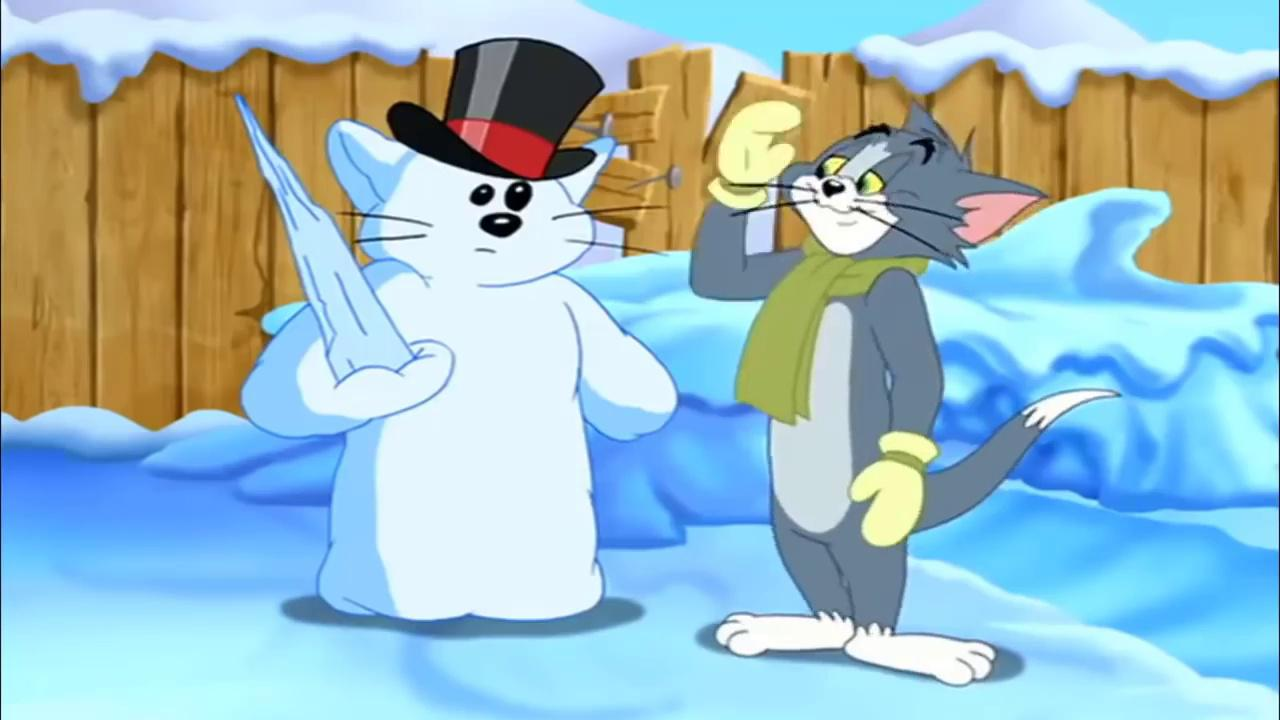

In [103]:

Image(filename='./trainData/happy/frame42.jpg')

In [104]:
preprocessed_image = prepare_image('frame42.jpg')
predictions = model.predict(preprocessed_image)
predictions


array([[4.2138607e-05, 1.9779050e-09, 9.9995196e-01, 2.5565448e-09,
        5.8923638e-06]], dtype=float32)